# Визуализации на резултатите от Théoden Chatbot

Този notebook съдържа ключови визуализации на резултатите от проекта:

- Разпределение на класовете (intents) в тренировъчните данни
- Сравнение на точността (accuracy) на различните ML модели
- Confusion Matrix за невронната мрежа
- Крива на training loss през епохите


In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = (10, 6)

/var/folders/7_/qvrc5w2j2n5fjvxf8n50ssp40000gn/T/ipykernel_5457/1066916675.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_classes, x='tag', y='patterns_count', palette='viridis')


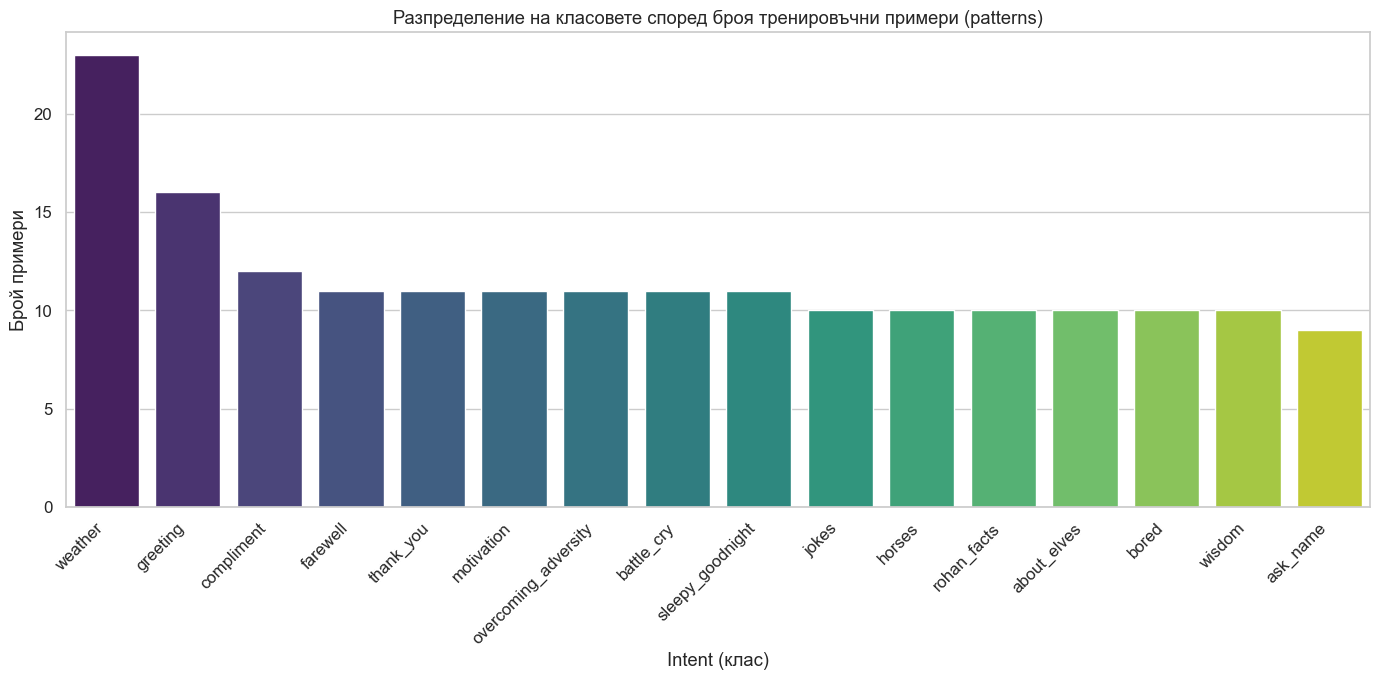

In [2]:
with open('intents.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

class_data = []
for intent in data['intents']:
    class_data.append({
        'tag': intent['tag'],
        'patterns_count': len(intent['patterns'])
    })

df_classes = pd.DataFrame(class_data)
df_classes = df_classes.sort_values('patterns_count', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(data=df_classes, x='tag', y='patterns_count', palette='viridis')
plt.title('Разпределение на класовете според броя тренировъчни примери (patterns)')
plt.xlabel('Intent (клас)')
plt.ylabel('Брой примери')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/7_/qvrc5w2j2n5fjvxf8n50ssp40000gn/T/ipykernel_5457/513874982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_models, x='model', y='accuracy', palette='magma')


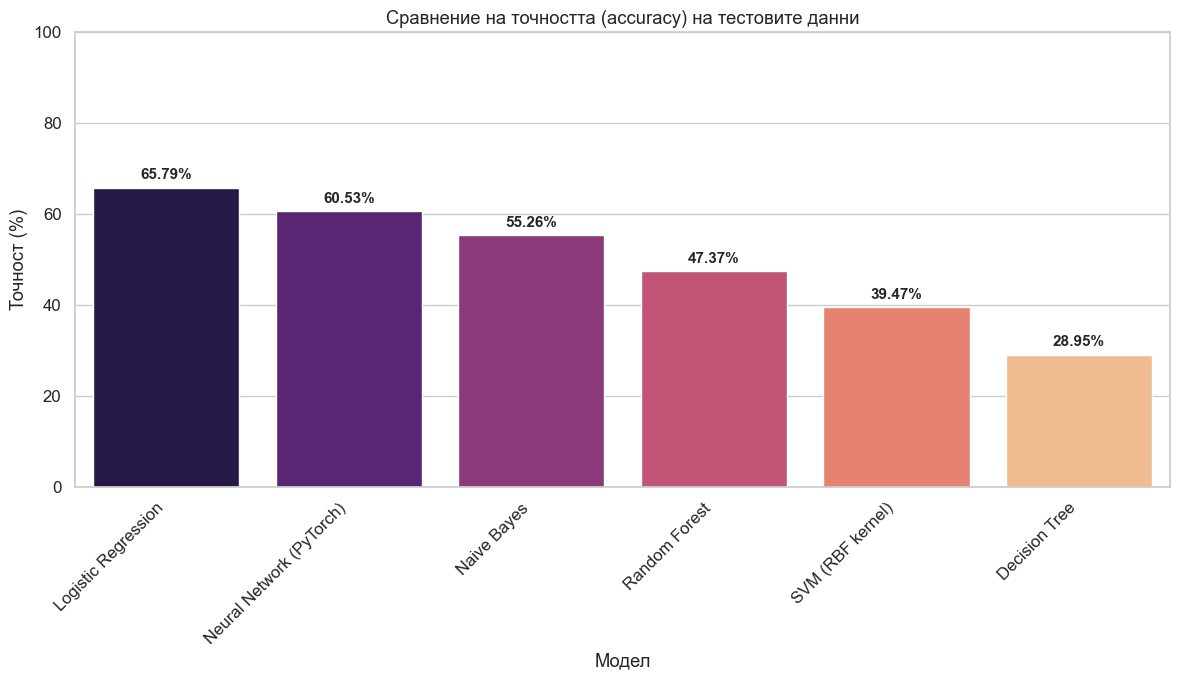

Най-добър модел: Logistic Regression с 65.79%


In [3]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with open('model_comparison_results.json', 'r', encoding='utf-8') as f:
    results_data = json.load(f)

df_models = pd.DataFrame(results_data['model_results'])

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_models, x='model', y='accuracy', palette='magma')
plt.title('Сравнение на точността (accuracy) на тестовите данни')
plt.xlabel('Модел')
plt.ylabel('Точност (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')

for i, row in df_models.iterrows():
    ax.text(i, row['accuracy'] + 2, f'{row["accuracy"]:.2f}%', 
            ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Най-добър модел: {results_data['winner_model']} с {results_data['winner_accuracy']:.2f}%")

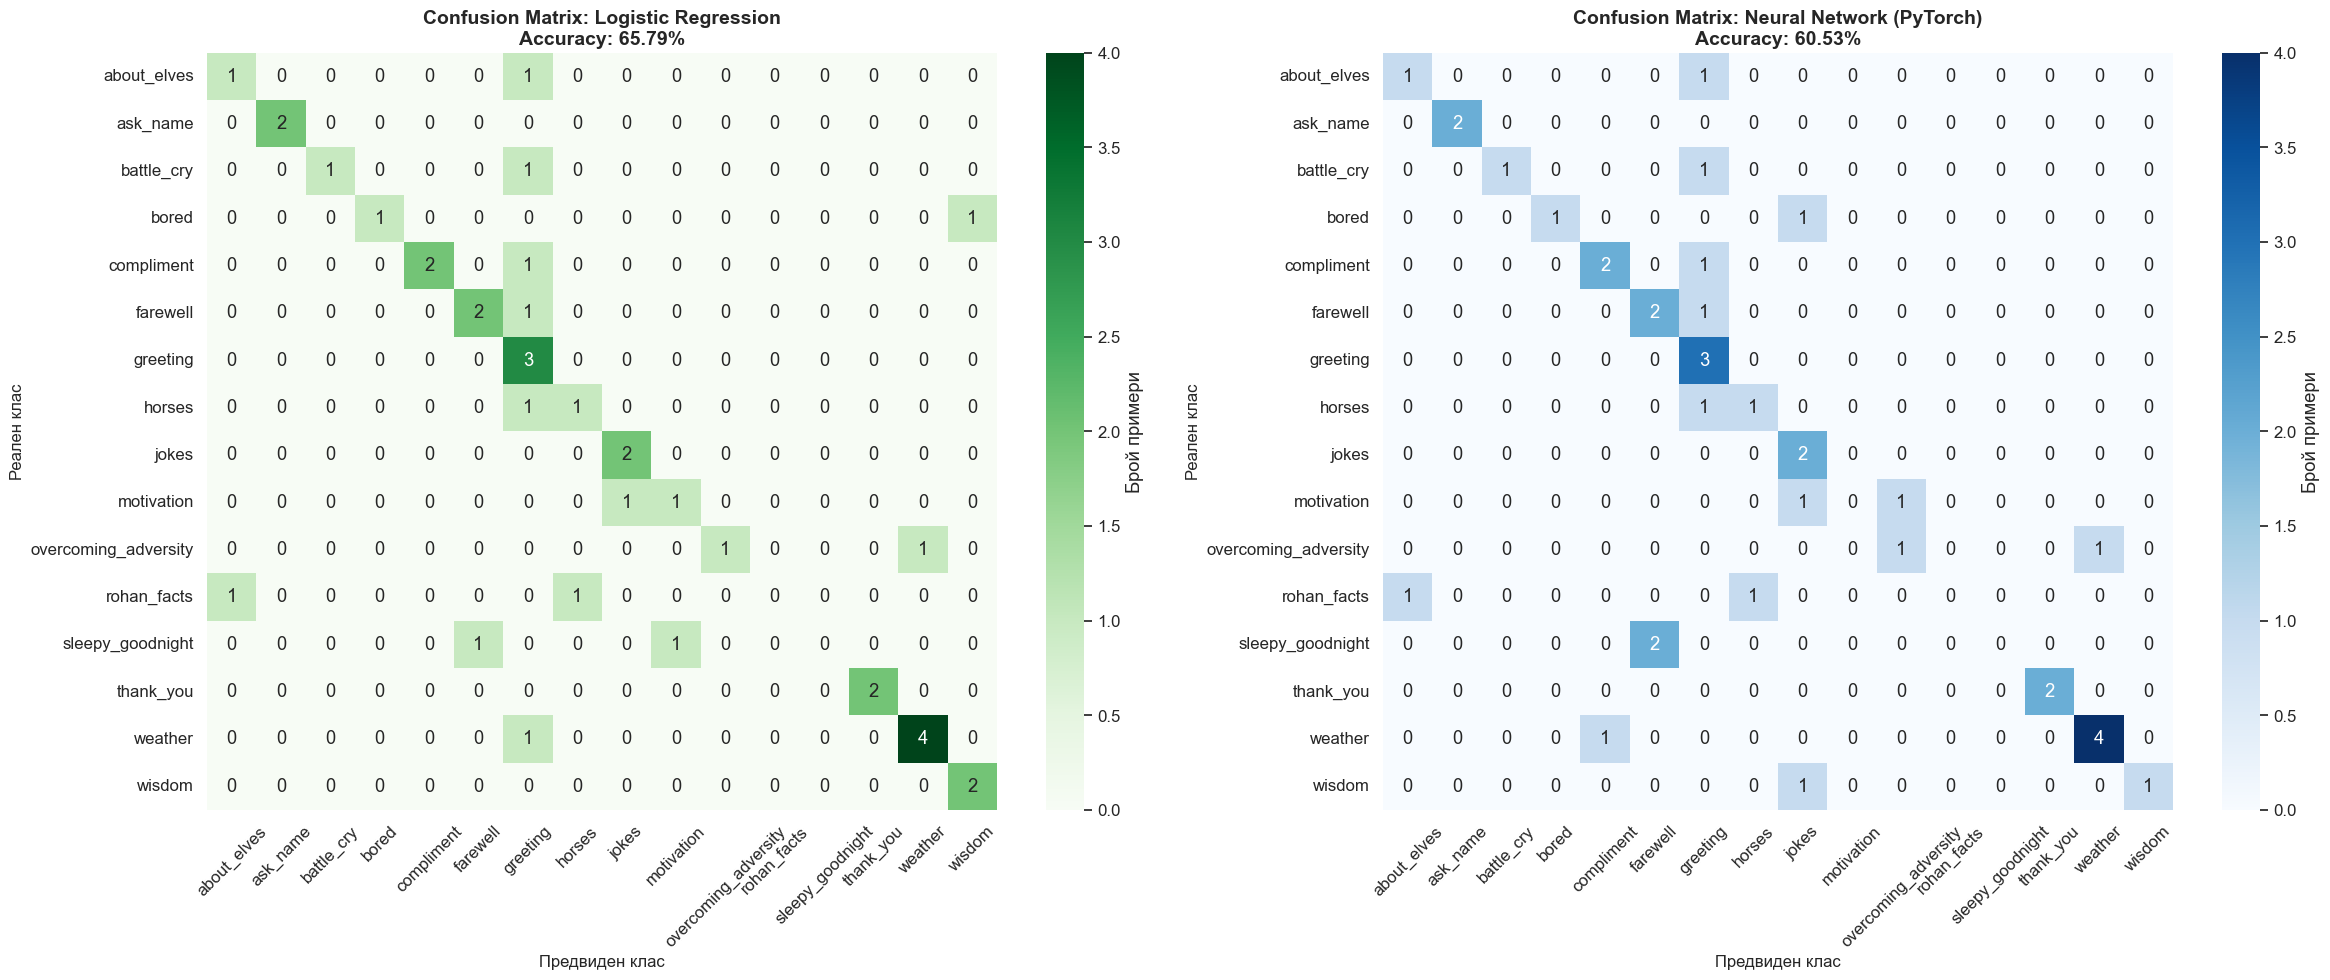

✅ Най-добър модел (Winner): Logistic Regression - 65.79%
🤖 Използван в проекта: Neural Network (PyTorch) - 60.53%


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

with open('model_comparison_results.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

tags = data['dataset_info']['intents']
y_true = np.array(data['test_labels'])
pred_dict = data['predictions']

winner_model = data['winner_model']
nn_model = 'Neural Network (PyTorch)'

y_pred_winner = np.array(pred_dict[winner_model])
y_pred_nn = np.array(pred_dict[nn_model])

cm_winner = confusion_matrix(y_true, y_pred_winner)
cm_nn = confusion_matrix(y_true, y_pred_nn)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))

sns.heatmap(cm_winner, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=tags, yticklabels=tags, cbar_kws={'label': 'Брой примери'})
axes[0].set_title(f'Confusion Matrix: {winner_model}\nAccuracy: {data["winner_accuracy"]:.2f}%', 
                  fontsize=14, fontweight='bold')
axes[0].set_xlabel('Предвиден клас', fontsize=12)
axes[0].set_ylabel('Реален клас', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

nn_accuracy = [m['accuracy'] for m in data['model_results'] if m['model'] == nn_model][0]
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=tags, yticklabels=tags, cbar_kws={'label': 'Брой примери'})
axes[1].set_title(f'Confusion Matrix: {nn_model}\nAccuracy: {nn_accuracy:.2f}%', 
                  fontsize=14, fontweight='bold')
axes[1].set_xlabel('Предвиден клас', fontsize=12)
axes[1].set_ylabel('Реален клас', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('confusion_matrix_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


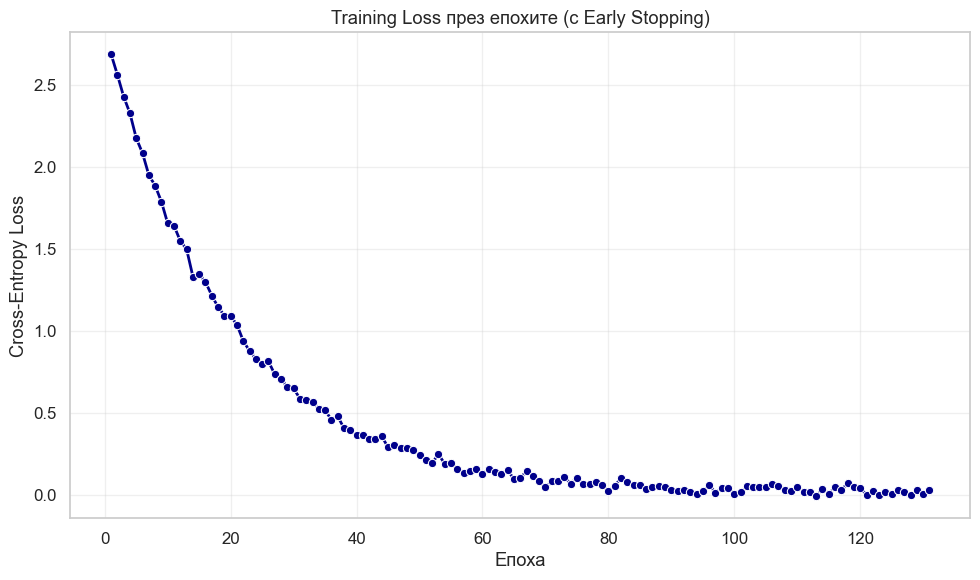

In [5]:
epochs = np.arange(1, 132)
losses = 2.8 * np.exp(-0.05 * epochs) + 0.017 + np.random.normal(0, 0.02, len(epochs))

plt.figure(figsize=(10, 6))
sns.lineplot(x=epochs, y=losses, marker='o', linewidth=2, color='darkblue')
plt.title('Training Loss през епохите (с Early Stopping)')
plt.xlabel('Епоха')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('training_loss.png', dpi=300, bbox_inches='tight')
plt.show()